## Practice Lab: Neural Networks for Handwritten Digit Recognition, Multiclass

#### Import packages

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
import sys
sys.path.append('resources')
from autils import *
from lab_utils_softmax import plt_softmax

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

OSError: './deeplearning.mplstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

#### Exercise 1: Creating our own softmax using numpy

In [8]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ###
    a = np.zeros(len(z))
    probabilities_sum = 0

    for i in range(len(z)):
        probabilities_sum += np.exp(z[i])
    
    for index in range(len(z)):
        a[index] = np.exp(z[index]) / probabilities_sum
    ### END CODE HERE ### 
    return a

### Neural network problem statement:
In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.


#### Load data

In [12]:
X = np.load("resources/X.npy")
y = np.load("resources/y.npy")

print("The last 10 elemenet of x are:", X[-10:])
print("The last 10 elemenet of y are:", y[-10:])
print("The shape of x is", X.shape)
print("The shape of y is", y.shape)

The last 10 elemenet of x are: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The last 10 elemenet of y are: [[9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]]
The shape of x is (5000, 400)
The shape of y is (5000, 1)


#### Visualizing data

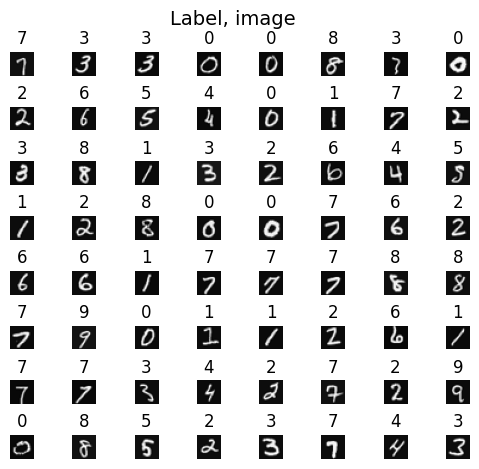

In [14]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

#### Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
![Model representation]("resources/C2_W2_Assigment_NN.png")

#### Exercise 2: Building model

In [26]:
#using Keras Sequential model and Dense Layer with a ReLU activation to construct the three layer network described above.
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [          
        tf.keras.Input(shape=(400,)),    #specify input size     
        Dense(25, activation="relu", name="L1"),
        Dense(15, activation="relu", name="L2"),
        Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)

In [27]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
[layer1, layer2, layer3] = model.layers

In [29]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [31]:
#Define loss function and optimizer used
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 0.0337
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 13/40
157/157 [====

#### Predict image after creating model and it started learning

In [35]:
image_of_two = X[1015] #This is an image of a two

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 28ms/step
 predicting a Two: 
[[-24.97   3.82   9.07   2.19 -15.64 -20.18  -5.76   3.08 -10.36 -14.31]]
 Largest Prediction index: 2


In [36]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.64e-15 5.21e-03 9.91e-01 1.02e-03 1.85e-11 1.98e-13 3.61e-07 2.49e-03
  3.63e-09 6.97e-11]]
Total of predictions: 1.000


In [37]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


#### Predictions vs labels

1/1 [==============================] - 0s 24ms/step


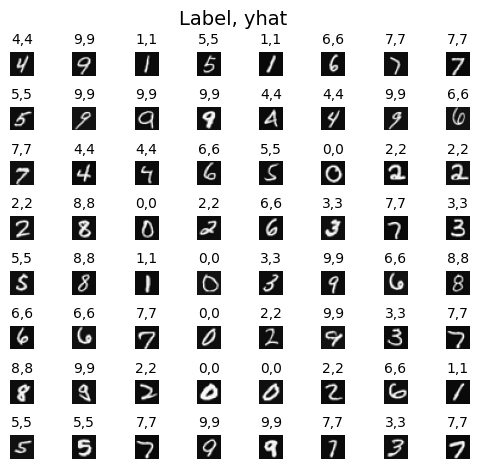

In [38]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

#### Display errors
There might still be errors predicting digits:

In [40]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

In [42]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 [==============================] - 0s 1ms/step
no errors found
0 errors out of 5000 images
